# E Commerce-Churn Prediction

# Introduction
It can cost anywhere between 5 and 25 times more to attract new customers than it does to retain existing ones. Statistics show an increase in customer retention by 5% can lead to a company’s profits growing by 25% to around 95% over a period of time. So I will build ML models to predict customer churn using data collected from e-commerce.



<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
2. [Exploratory Data Analysis](#2)
    * [Analysis of Numerical and Categorical Variables](#3)
    * [Analysis of Numerical Variables by Target ](#4)
    * [Analysis of Categorical Variables by Target](#5)
    * [Correlation](#6)
3. [Data Visualization](#7)
4. [Data Preprocessing & Feature Engineering](#8)
    * [Missing Value](#9)
    * [Outliers](#10)
    * [Encoding](#11)
5. [Modelling](#12)
    * [Base Models](#13)
    * [Hyperparameter Optimization](#14)
    * [Stacking & Ensemble Learning](#15)
    * [Feature Selection](#16)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


<a id = "1"></a><br>
# Load and Check Data

In [2]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')

In [3]:
def check_df(dataframe, head=5):
    print("------------------- Shape -------------------")
    print(dataframe.shape)
    print("------------------- Types -------------------")
    print(dataframe.dtypes)
    print("------------------- Head --------------------")
    print(dataframe.head(head))
    print("------------------- Tail --------------------")
    print(dataframe.tail(head))
    print("------------------- NA ----------------------")
    print(dataframe.isnull().sum())
    print("------------------- Quantiles -------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

------------------- Shape -------------------
(5630, 20)
------------------- Types -------------------
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object
------------------- Head --------------------
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

CustomerID    Churn   Tenure  CityTier  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
count    5630.000 5630.000 5366.000  5630.000         5379.000        5375.000                  5630.000           5630.000         5630.000  5630.000   
mean    52815.500    0.168   10.190     1.655           15.640           2.932                     3.689              3.067            4.214     0.285   
std      1625.385    0.374    8.557     0.915            8.531           0.722                     1.024              1.380            2.584     0.451   
min     50001.000    0.000    0.000     1.000            5.000           0.000                     1.000              1.000            1.000     0.000   
25%     51408.250    0.000    2.000     1.000            9.000           2.000                     3.000              2.000            2.000     0.000   
50%     52815.500    0.000    9.000     1.000           14.000           3.000                     4.000              3.000            3.000     0.000   
75%     54222.750    0.000   16.000     3.000           20.000           3.000                     4.000              4.000            6.000     1.000   
max     55630.000    1.000   61.000     3.000          127.000           5.000                     6.000              5.000           22.000     1.000   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
count                     5365.000    5374.000    5372.000           5323.000        5630.000  
mean                        15.708       1.751       3.008              4.543         177.223  
std                          3.675       1.895       2.940              3.654          49.207  
min                         11.000       0.000       1.000              0.000           0.000  
25%                         13.000       1.000       1.000              2.000         145.770  
50%                         15.000       1.000       2.000              3.000         163.280  
75%                         18.000       2.000       3.000              7.000         196.393  
max                         26.000      16.000      16.000             46.000         324.990

In [6]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [7]:
df.describe(include='O') 

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat MaritalStatus
count                  5630                 5630   5630                5630          5630
unique                    3                    7      2                   6             3
top            Mobile Phone           Debit Card   Male  Laptop & Accessory       Married
freq                   2765                 2314   3384                2050          2986

<a id = "2"></a><br>
# Exploratory Data Analysis

<a id = "3"></a><br>
## Analysis of Numerical and Categorical Variables

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
      # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5630
Variables: 19
cat_cols: 11
num_cols: 8
cat_but_car: 0
num_but_cat: 6


In [9]:
print(cat_cols)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Churn', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']


In [10]:
print(num_cols)

['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)

              PreferredLoginDevice  Ratio
Mobile Phone                  2765 49.112
Computer                      1634 29.023
Phone                         1231 21.865
##########################################
                  PreferredPaymentMode  Ratio
Debit Card                        2314 41.101
Credit Card                       1501 26.661
E wallet                           614 10.906
UPI                                414  7.353
COD                                365  6.483
CC                                 273  4.849
Cash on Delivery                   149  2.647
##########################################
        Gender  Ratio
Male      3384 60.107
Female    2246 39.893
##########################################
                    PreferedOrderCat  Ratio
Laptop & Accessory              2050 36.412
Mobile Phone                    1271 22.575
Fashion                          826 14.671
Mobile                           809 14.369
Grocery                          410  7.282
Other

count   5366.000
mean      10.190
std        8.557
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        4.000
40%        6.000
50%        9.000
60%       11.000
70%       14.000
80%       18.000
90%       23.000
95%       27.000
99%       30.000
max       61.000
Name: Tenure, dtype: float64


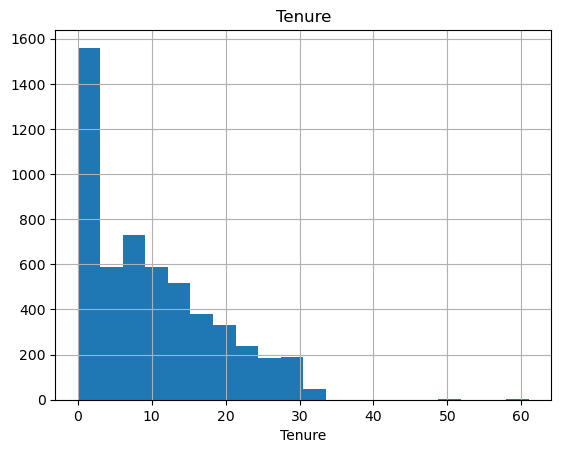

count   5379.000
mean      15.640
std        8.531
min        5.000
5%         6.000
10%        7.000
20%        8.000
30%        9.000
40%       11.000
50%       14.000
60%       15.000
70%       17.000
80%       23.000
90%       30.000
95%       33.000
99%       35.000
max      127.000
Name: WarehouseToHome, dtype: float64


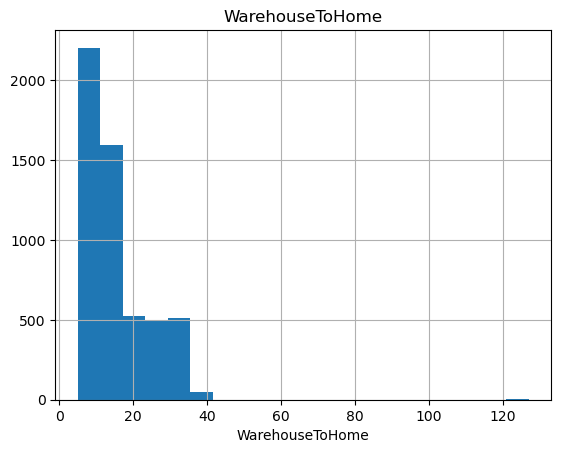

count   5630.000
mean       4.214
std        2.584
min        1.000
5%         1.000
10%        2.000
20%        2.000
30%        2.000
40%        3.000
50%        3.000
60%        4.000
70%        5.000
80%        6.000
90%        8.000
95%       10.000
99%       11.000
max       22.000
Name: NumberOfAddress, dtype: float64


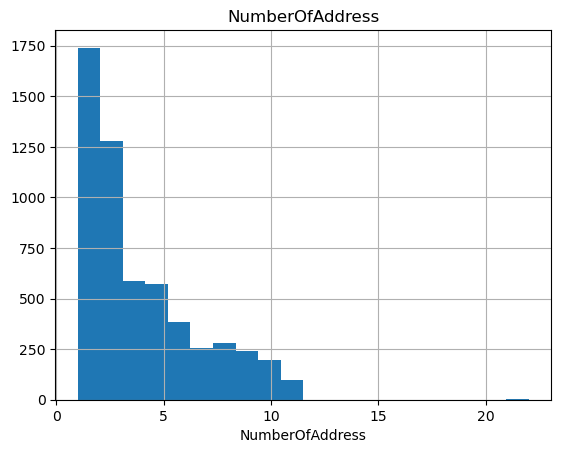

count   5365.000
mean      15.708
std        3.675
min       11.000
5%        11.000
10%       12.000
20%       12.000
30%       13.000
40%       14.000
50%       15.000
60%       16.000
70%       17.000
80%       19.000
90%       21.000
95%       23.000
99%       25.000
max       26.000
Name: OrderAmountHikeFromlastYear, dtype: float64


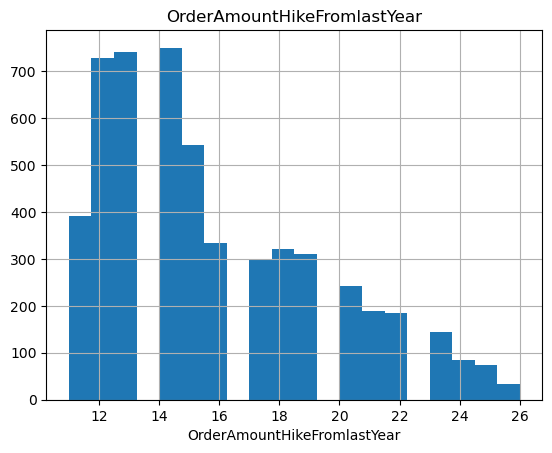

count   5374.000
mean       1.751
std        1.895
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        1.000
40%        1.000
50%        1.000
60%        2.000
70%        2.000
80%        2.000
90%        4.000
95%        6.000
99%        9.000
max       16.000
Name: CouponUsed, dtype: float64


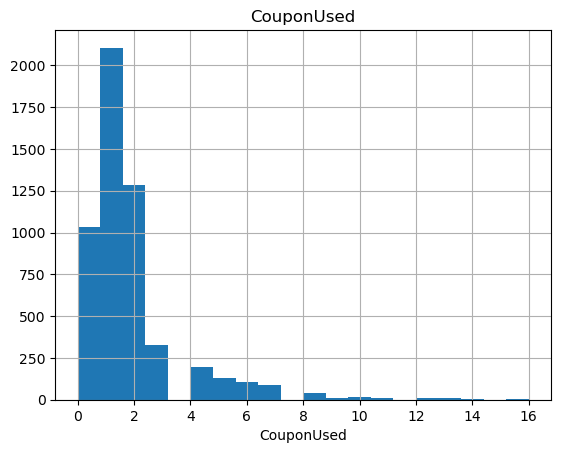

count   5372.000
mean       3.008
std        2.940
min        1.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        2.000
50%        2.000
60%        2.000
70%        2.000
80%        4.000
90%        7.000
95%        9.000
99%       15.000
max       16.000
Name: OrderCount, dtype: float64


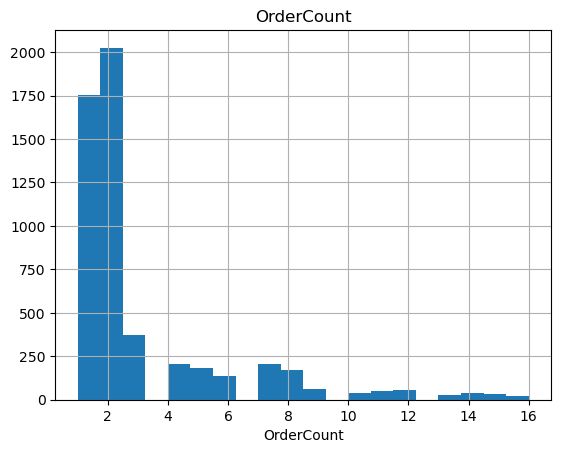

count   5323.000
mean       4.543
std        3.654
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        2.000
40%        3.000
50%        3.000
60%        4.000
70%        7.000
80%        8.000
90%        9.000
95%       11.000
99%       15.000
max       46.000
Name: DaySinceLastOrder, dtype: float64


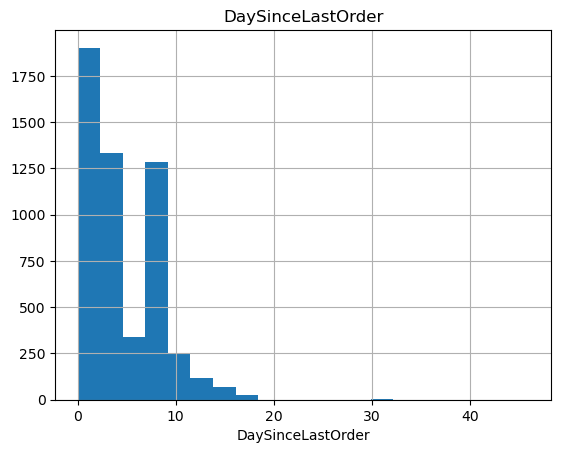

count   5630.000
mean     177.223
std       49.207
min        0.000
5%       123.034
10%      126.860
20%      140.804
30%      148.334
40%      153.654
50%      163.280
60%      173.066
70%      187.090
80%      208.814
90%      259.720
95%      291.939
99%      318.743
max      324.990
Name: CashbackAmount, dtype: float64


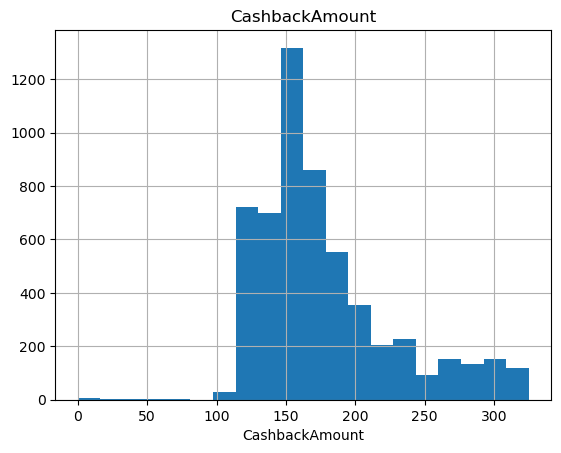

In [12]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_cols:
    num_summary(df, col, plot=True)

In [13]:
df["Tenure"].value_counts().head()

1.000    690
0.000    508
8.000    263
9.000    247
7.000    221
Name: Tenure, dtype: int64

<a id = "4"></a><br>
## Analysis of Numerical Variables by Target Variable

In [14]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       Tenure
Churn        
0      11.502
1       3.379


       WarehouseToHome
Churn                 
0               15.354
1               17.134


       NumberOfAddress
Churn                 
0                4.163
1                4.466


       OrderAmountHikeFromlastYear
Churn                             
0                           15.725
1                           15.627


       CouponUsed
Churn            
0           1.758
1           1.717


       OrderCount
Churn            
0           3.047
1           2.824


       DaySinceLastOrder
Churn                   
0                  4.807
1                  3.236


       CashbackAmount
Churn                
0             180.635
1             160.371




<a id = "5"></a><br>
## Analysis of Categorical Variables by Target

In [15]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

PreferredLoginDevice
              TARGET_MEAN  Count  Ratio
Computer            0.198   1634 29.023
Mobile Phone        0.126   2765 49.112
Phone               0.224   1231 21.865


PreferredPaymentMode
                  TARGET_MEAN  Count  Ratio
CC                      0.216    273  4.849
COD                     0.288    365  6.483
Cash on Delivery        0.154    149  2.647
Credit Card             0.129   1501 26.661
Debit Card              0.154   2314 41.101
E wallet                0.228    614 10.906
UPI                     0.174    414  7.353


Gender
        TARGET_MEAN  Count  Ratio
Female        0.155   2246 39.893
Male          0.177   3384 60.107


PreferedOrderCat
                    TARGET_MEAN  Count  Ratio
Fashion                   0.155    826 14.671
Grocery                   0.049    410  7.282
Laptop & Accessory        0.102   2050 36.412
Mobile                    0.272    809 14.369
Mobile Phone              0.275   1271 22.575
Others                    0.076    264

<a id = "6"></a><br>
## Correlation

In [16]:
df[num_cols].corr()

Tenure  WarehouseToHome  NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
Tenure                        1.000           -0.018            0.238                        0.006       0.129       0.186              0.185           0.476
WarehouseToHome              -0.018            1.000           -0.011                        0.039      -0.004       0.003              0.018          -0.009
NumberOfAddress               0.238           -0.011            1.000                        0.016       0.042      -0.008             -0.065           0.187
OrderAmountHikeFromlastYear   0.006            0.039            0.016                        1.000       0.033       0.023              0.006           0.018
CouponUsed                    0.129           -0.004            0.042                        0.033       1.000       0.745              0.359           0.287
OrderCount                    0.186            0.003           -0.008                        0.023       0.745       1.000              0.498           0.361
DaySinceLastOrder             0.185            0.018           -0.065                        0.006       0.359       0.498              1.000           0.347
CashbackAmount                0.476           -0.009            0.187                        0.018       0.287       0.361              0.347           1.000

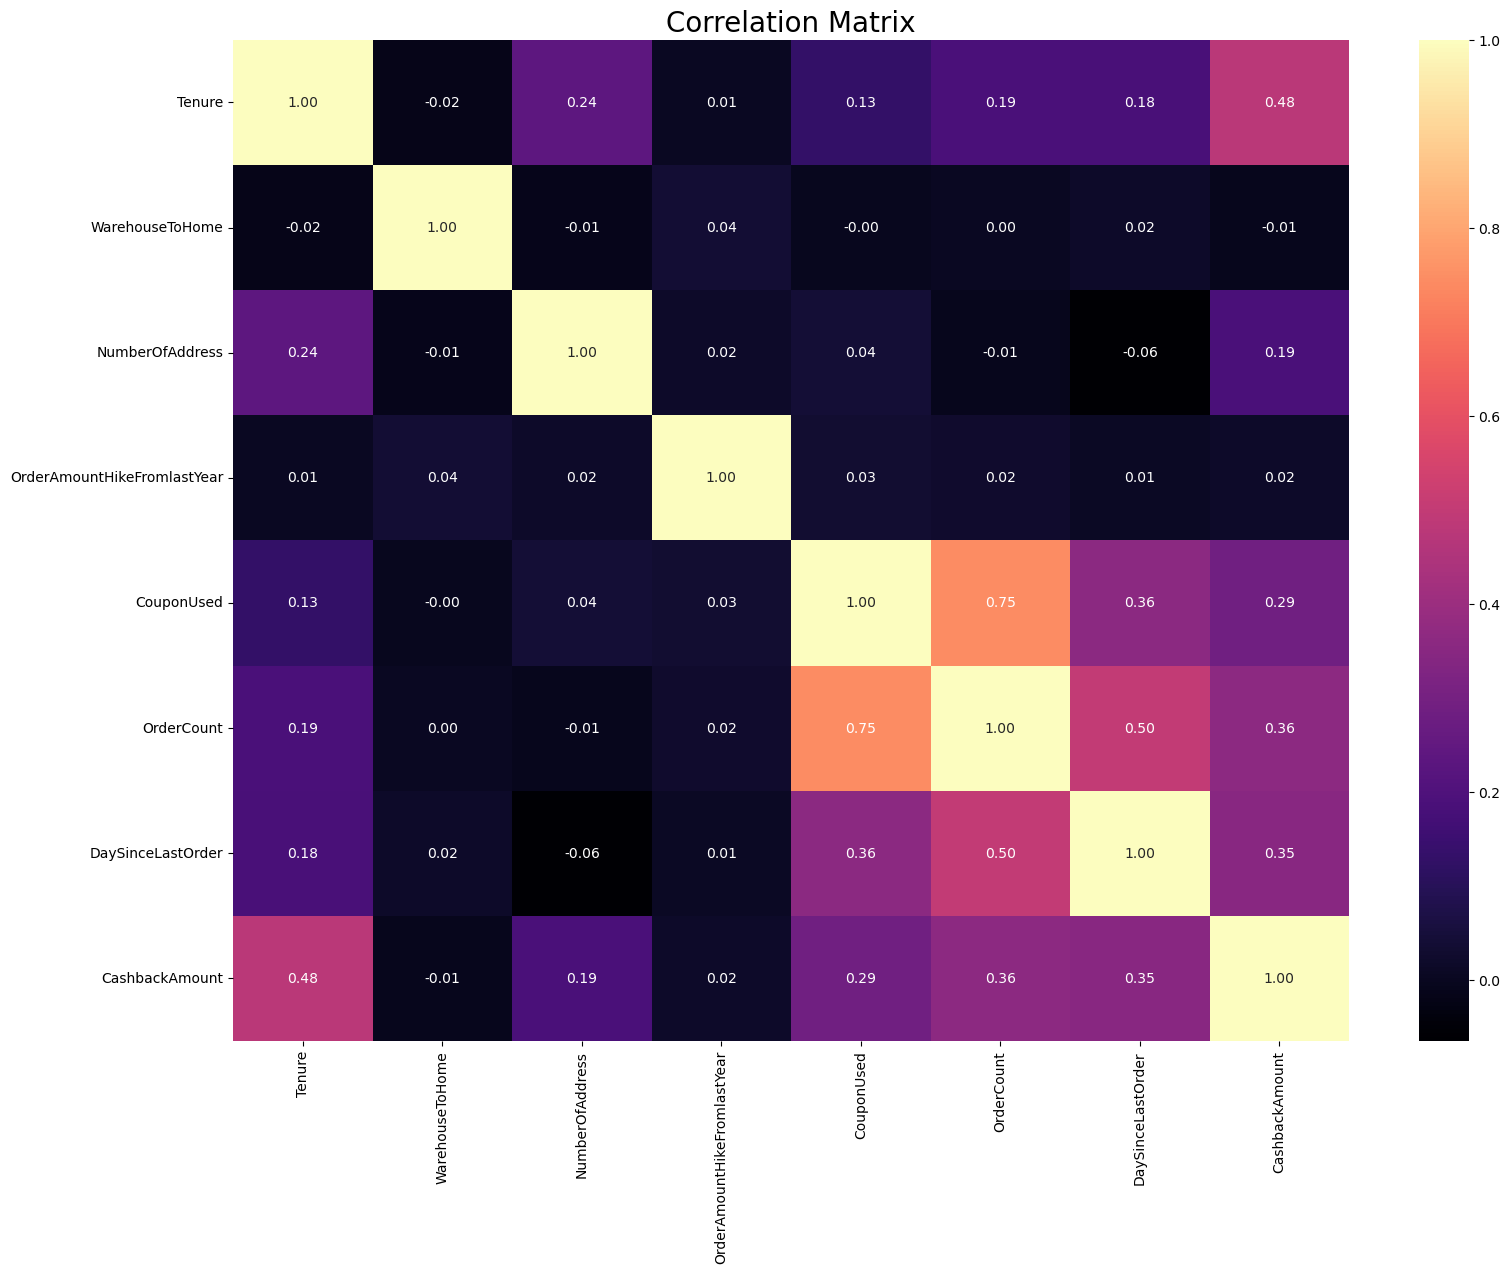

In [17]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<a id = "7"></a><br>
# Data Visualization

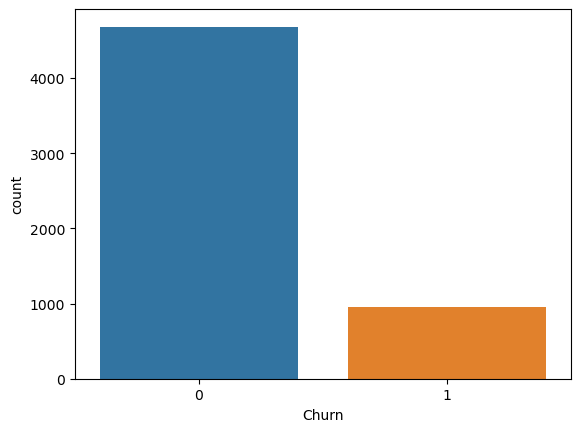

In [18]:
sns.countplot(x="Churn",data=df)
plt.show()

<Figure size 5500x700 with 0 Axes>

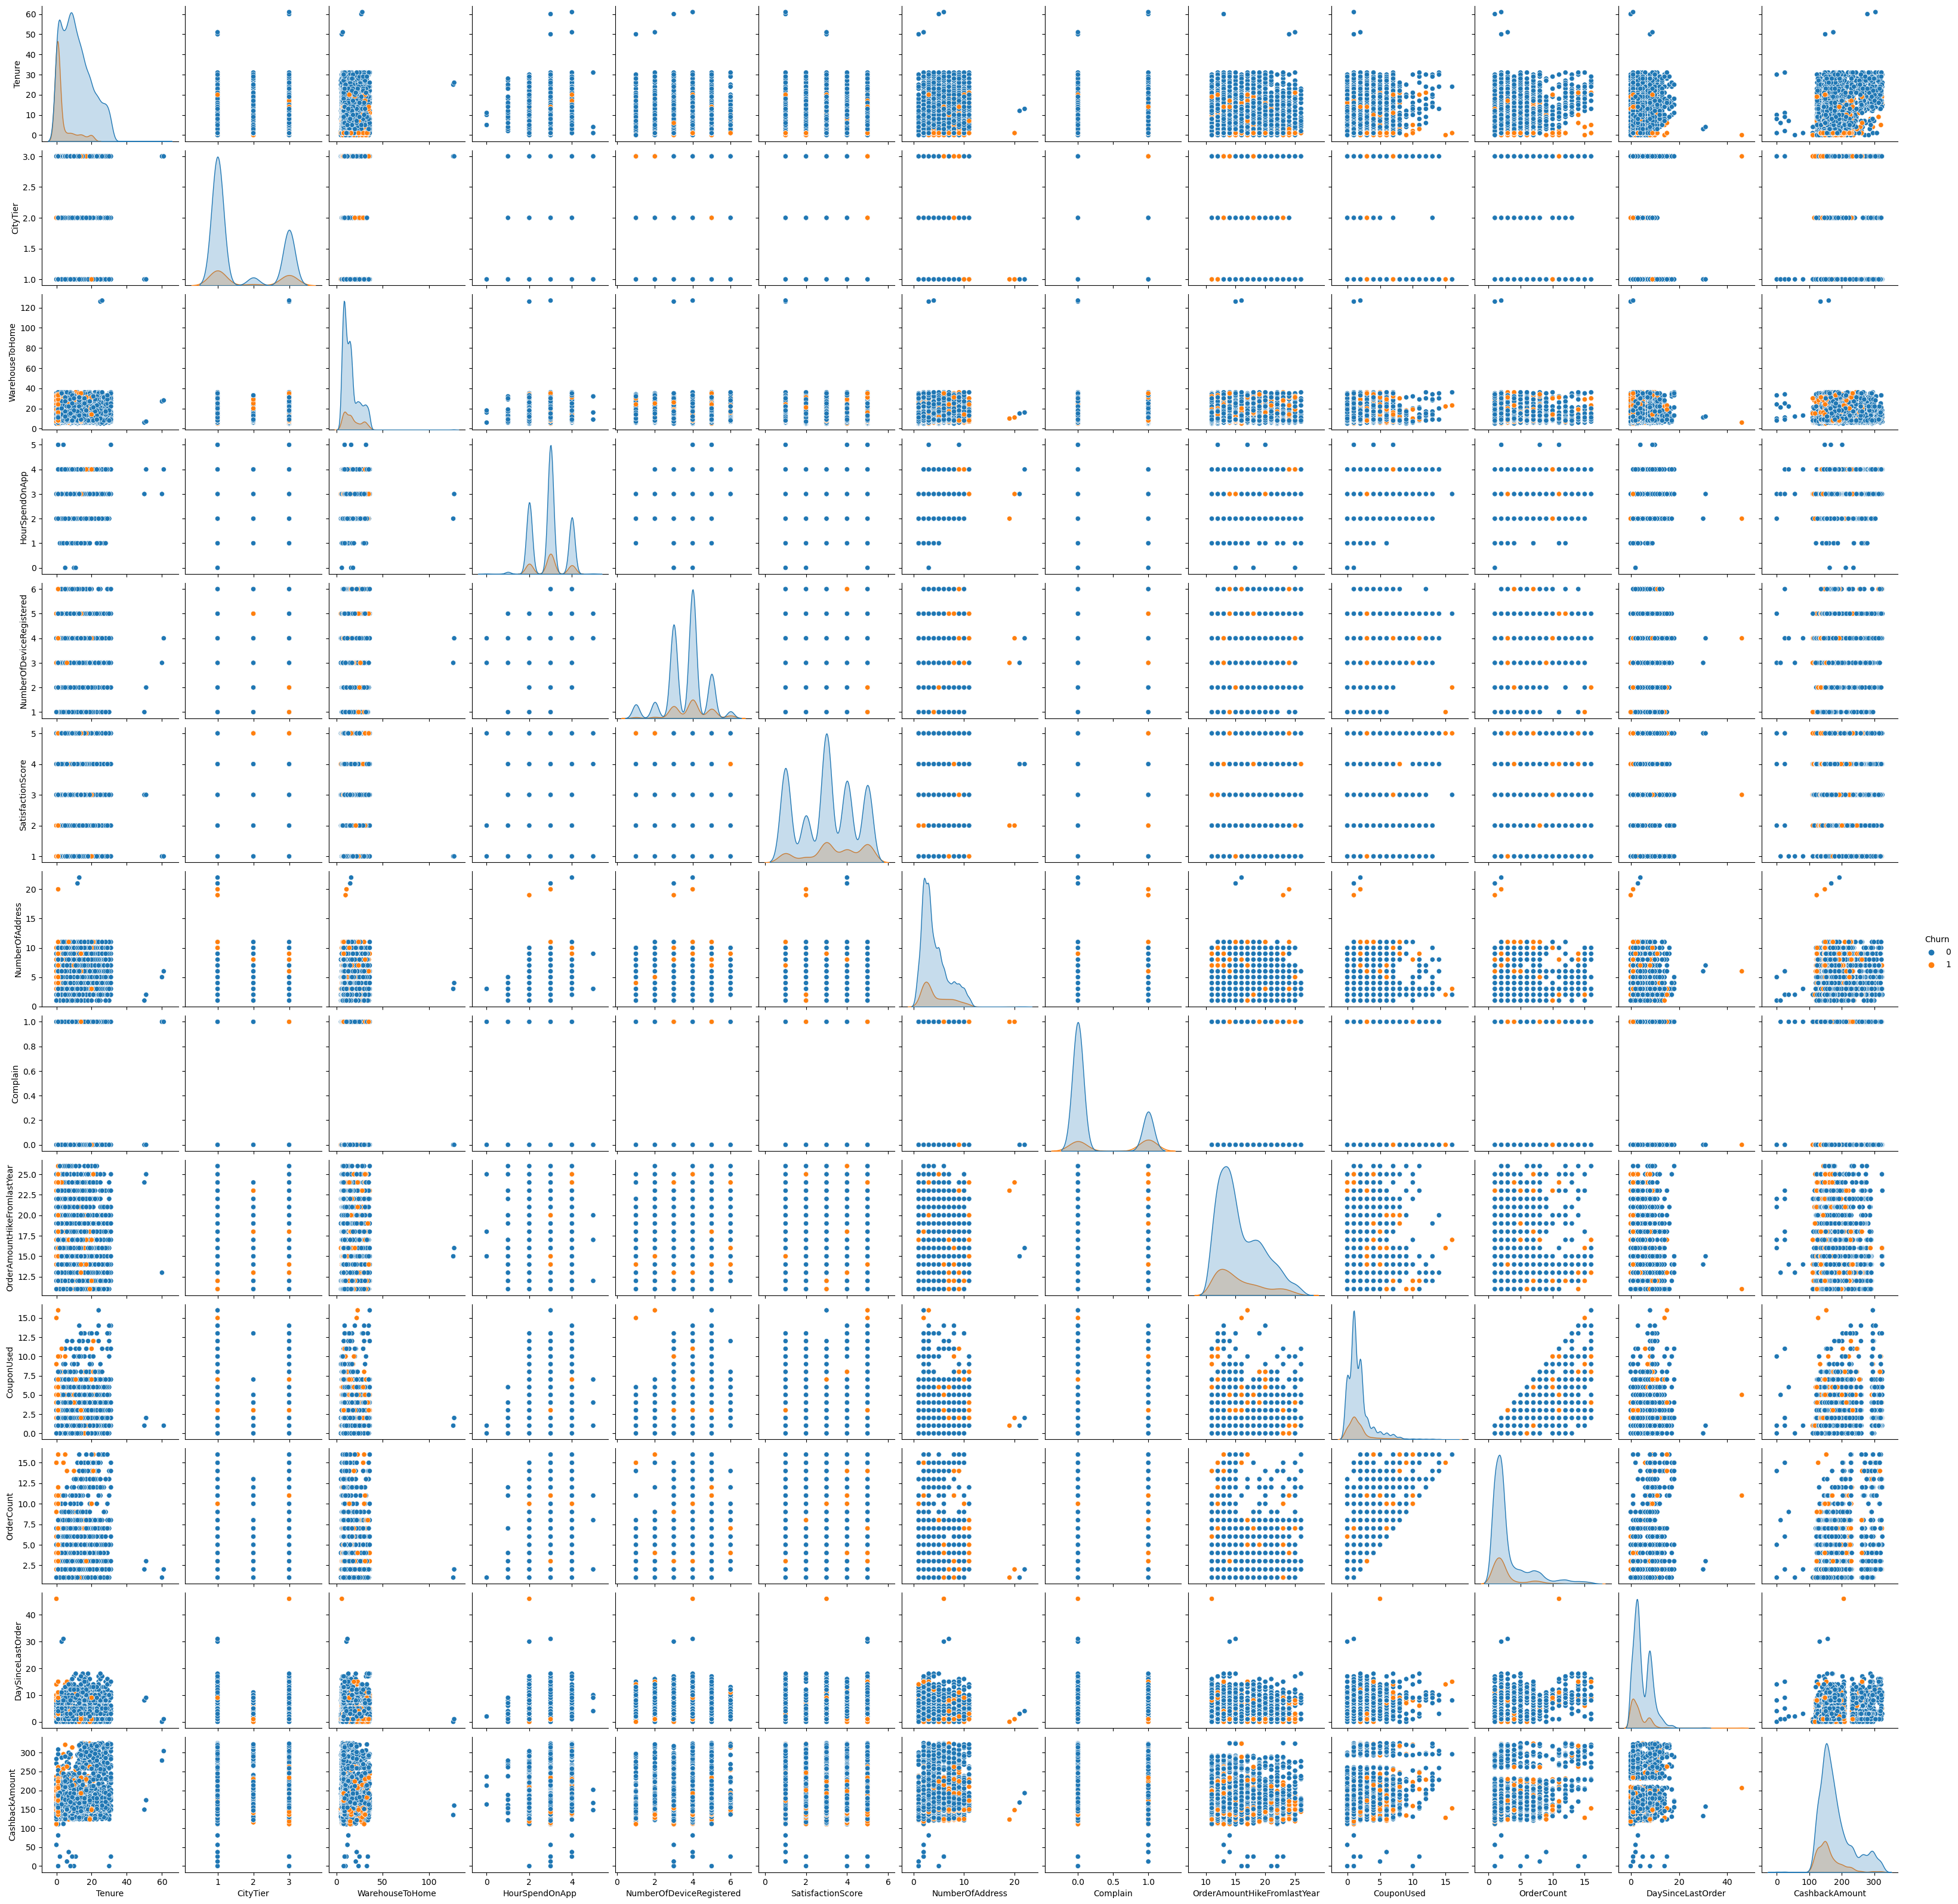

In [19]:
plt.figure(figsize=(55,7))
sns.pairplot(data=df,kind='scatter',hue='Churn')
plt.show()

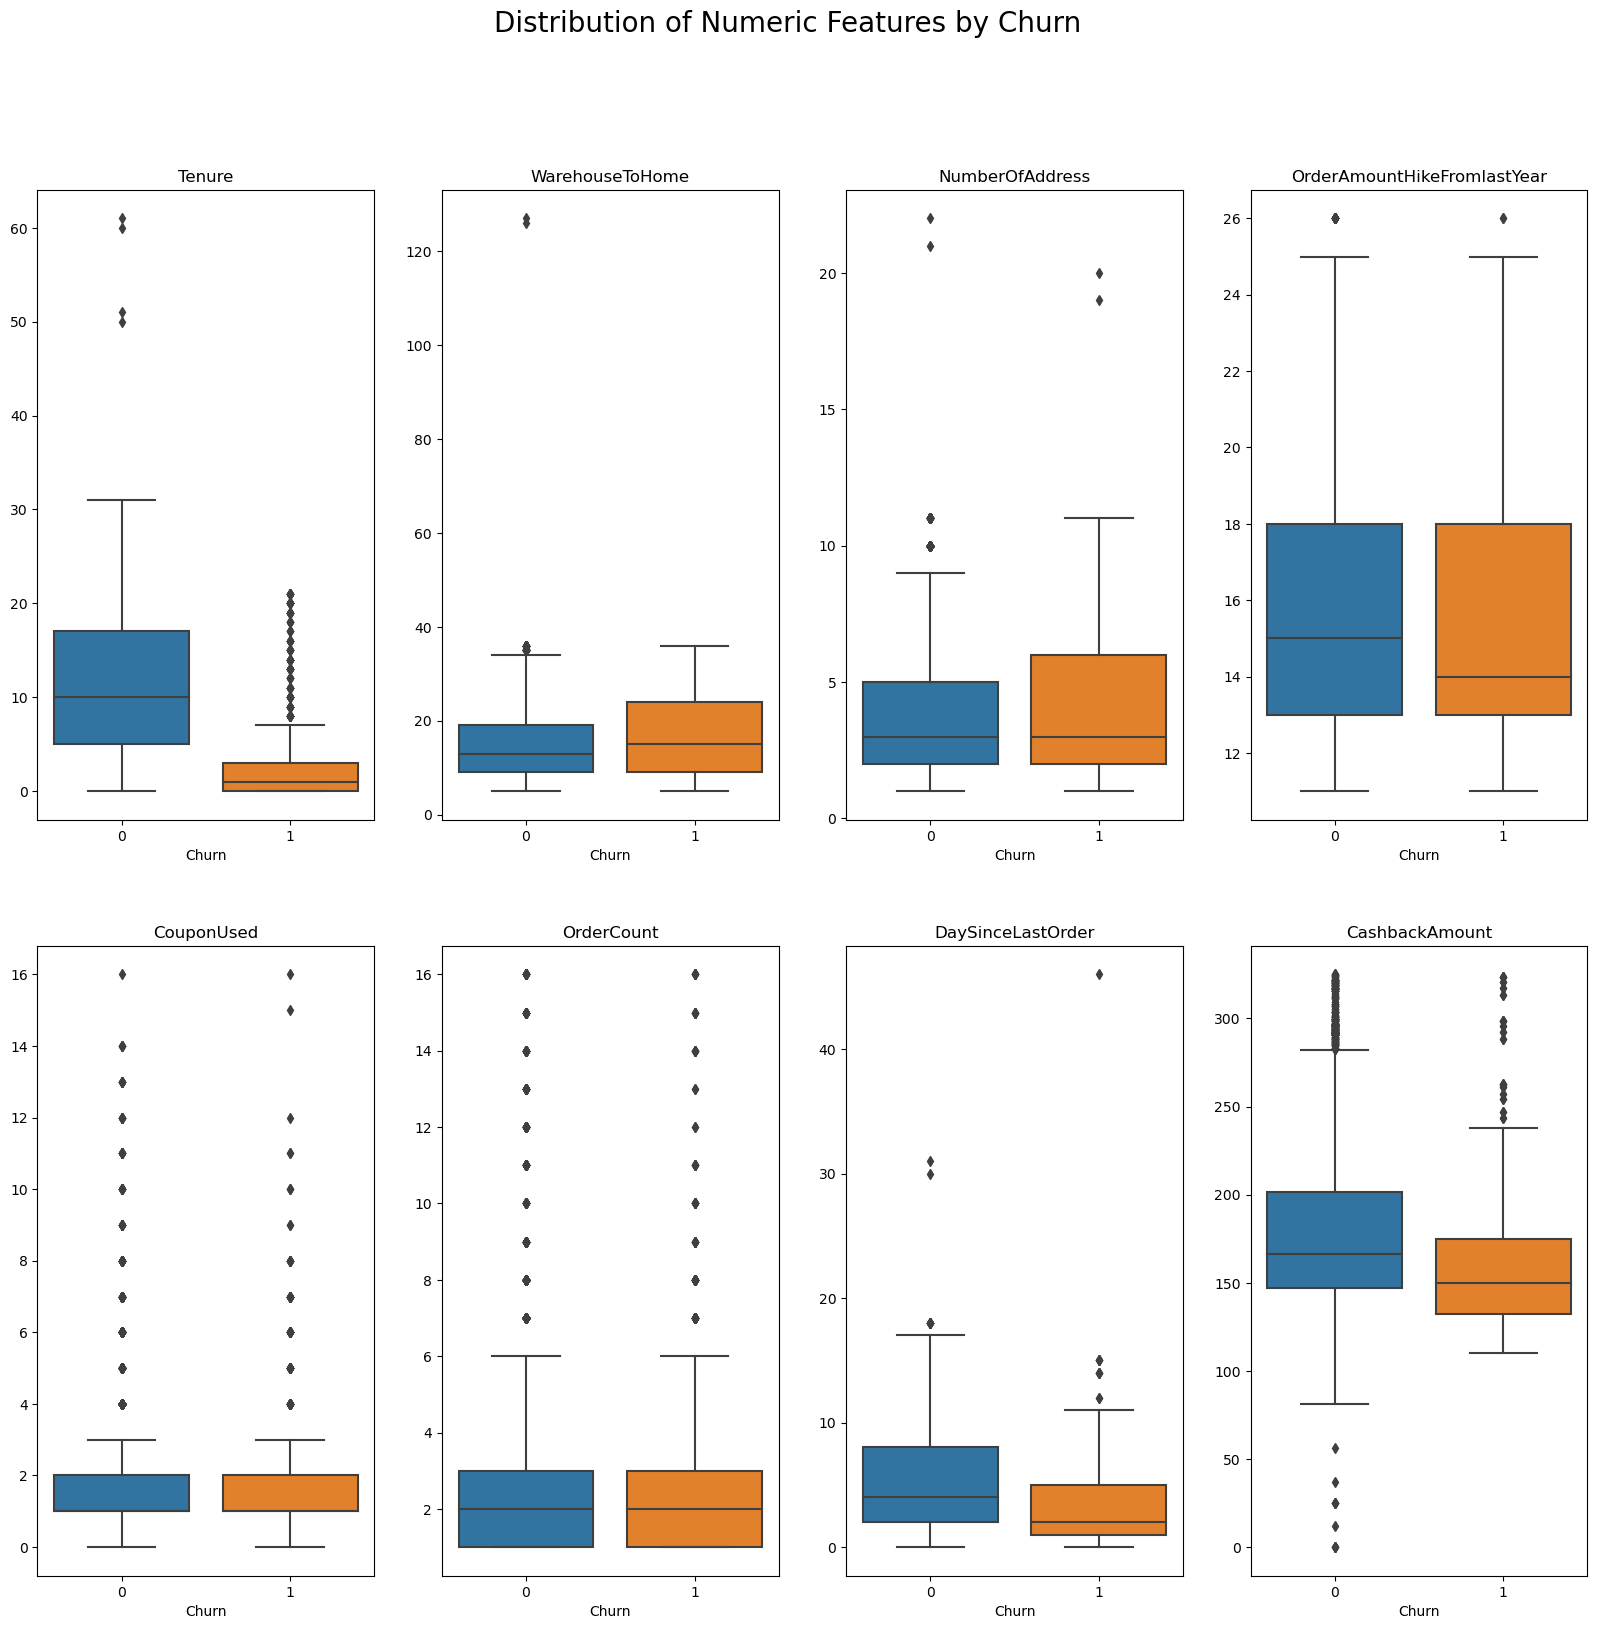

In [20]:
fig, ax = plt.subplots(2,4,figsize=(20, 18))
fig.suptitle('Distribution of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()
for idx,c in enumerate(num_cols):
    dff = df[df[c].notnull()].copy()
    ax[idx].set_title(c) 
    sns.boxplot(x='Churn', y=c, data=dff, ax=ax[idx])
    ax[idx].set_ylabel('')
plt.show()

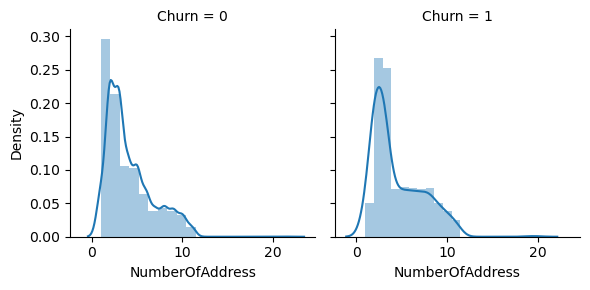

In [21]:
g = sns.FacetGrid(df, col = "Churn")
g.map(sns.distplot, "NumberOfAddress", bins = 20)
plt.show()

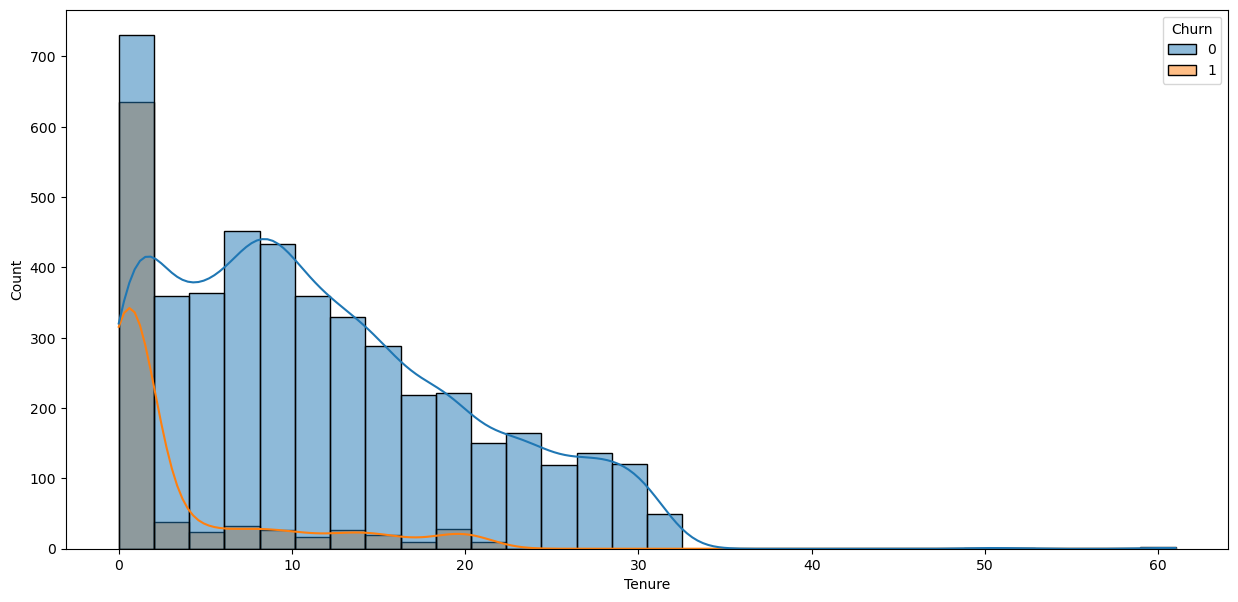

In [22]:
tenure = df[['Tenure']]
plt.figure(figsize=(15,7))
for i in tenure:
    sns.histplot(data=df,x=i,hue='Churn',kde=True,bins=30)
    plt.show()

<a id = "8"></a><br>
# Data Preprocessing & Feature Engineering

<a id = "9"></a><br>
## Missing Value

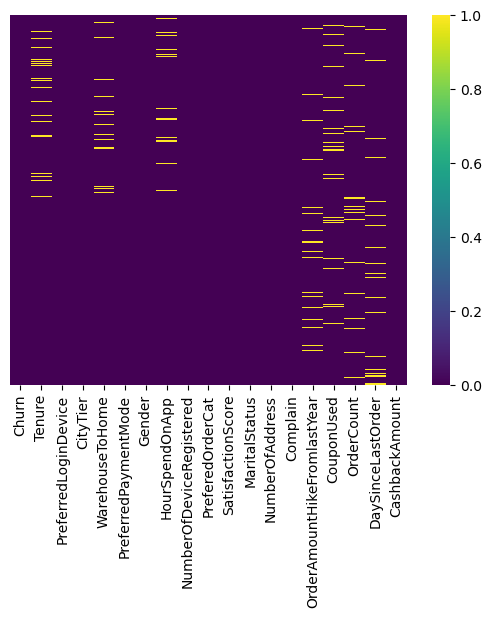

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
plt.show()

In [24]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [25]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

                             n_miss  ratio
DaySinceLastOrder               307  5.450
OrderAmountHikeFromlastYear     265  4.710
Tenure                          264  4.690
OrderCount                      258  4.580
CouponUsed                      256  4.550
HourSpendOnApp                  255  4.530
WarehouseToHome                 251  4.460


In [26]:
df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].median(), inplace=True)
df["OrderAmountHikeFromlastYear"].fillna(df["OrderAmountHikeFromlastYear"].median(), inplace=True)
df["Tenure"].fillna(df["Tenure"].median(), inplace=True)
df["OrderCount"].fillna(df["OrderCount"].median(), inplace=True)
df["CouponUsed"].fillna(df["CouponUsed"].median(), inplace=True)
df["HourSpendOnApp"].fillna(df["HourSpendOnApp"].median(), inplace=True)
df["WarehouseToHome"].fillna(df["WarehouseToHome"].median(), inplace=True)

In [27]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

<a id = "10"></a><br>
## Outliers

In [28]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_cols:
    print(col, check_outlier(df, col))

Tenure False
WarehouseToHome True
NumberOfAddress False
OrderAmountHikeFromlastYear False
CouponUsed True
OrderCount False
DaySinceLastOrder True
CashbackAmount False


In [29]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    

In [30]:
for col in num_cols:
    replace_with_thresholds(df,col)

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

Tenure False
WarehouseToHome False
NumberOfAddress False
OrderAmountHikeFromlastYear False
CouponUsed False
OrderCount False
DaySinceLastOrder False
CashbackAmount False


<a id = "11"></a><br>
## Encoding

In [32]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5630
Variables: 19
cat_cols: 11
num_cols: 8
cat_but_car: 0
num_but_cat: 6


In [33]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]

for col in binary_cols:
    df = label_encoder(df, col)

In [34]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols, drop_first=True)

In [35]:
df.head()

Churn  Tenure  WarehouseToHome  Gender  NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0      1   4.000            6.000       0            9.000                       11.000       1.000       1.000              5.000         159.930   
1      1   9.000            8.000       1            7.000                       15.000       0.000       1.000              0.000         120.900   
2      1   9.000           30.000       1            6.000                       14.000       0.000       1.000              3.000         120.280   
3      1   0.000           15.000       1            8.000                       23.000       0.000       1.000              3.000         134.070   
4      1   0.000           12.000       1            3.000                       11.000       1.000       1.000              3.000         129.600   

   PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  PreferredPaymentMode_COD  PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
0                                  1                           0                         0                                      0                                 0   
1                                  0                           1                         0                                      0                                 0   
2                                  0                           1                         0                                      0                                 0   
3                                  0                           1                         0                                      0                                 0   
4                                  0                           1                         0                                      0                                 0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                                1                              0                         0                         0                                    1   
1                                0                              0                         1                         0                                    0   
2                                1                              0                         0                         0                                    0   
3                                1                              0                         0                         0                                    1   
4                                0                              0                         0                         0                                    0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  CityTier_2  CityTier_3  \
0                        0                              0                        0                      0                     1           0           1   
1                        1                              0                        0                      0                     1           0           0   
2                        1                              0                        0                      0                     1           0           0   
3                        0                              0                        0                      0                     1           0           1   
4                        1                              0                        0                      0                     1           0           0   

   HourSpendOnApp_1.0  HourSpendOnApp_2.0  HourSpendOnApp_3.0  HourSpendOnApp_4.0  HourSpendOnApp_5.0  NumberOfDeviceRegistered_2  NumberOfDeviceRegistered_3  \
0                   0                   0                 

In [36]:
print(df.shape)

(5630, 42)


<a id = "12"></a><br>
# Modelling

In [37]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

<a id = "13"></a><br>
## Base Models

In [38]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

In [39]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [40]:
base_models(X, y)

Base Models....
roc_auc: 0.891 (LR) 
roc_auc: 0.9308 (KNN) 
roc_auc: 0.9222 (SVC) 
roc_auc: 0.9066 (CART) 
roc_auc: 0.983 (RF) 
roc_auc: 0.915 (Adaboost) 
roc_auc: 0.9374 (GBM) 
roc_auc: 0.9844 (XGBoost) 
roc_auc: 0.9825 (LightGBM) 
roc_auc: 0.9799 (CatBoost) 


Top performing XGBoost and LightGBM models.

<a id = "14"></a><br>
## Hyperparameter Optimization
Let's examine the predefined hyperparameter values of the models.

In [41]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
XGBClassifier(eval_metric='logloss').get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Let's fine tune hyperparameters for some models

In [46]:
knn_params = {"n_neighbors": range(2, 10)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(1, 20)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01, None],
                  "max_depth": [5, 8, None],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 1, None]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [200, 300, 500],
                   "colsample_bytree": [0.1, 0.5, 1]}

classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [47]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [48]:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.9308
roc_auc (After): 0.9371
KNN best params: {'n_neighbors': 3}

########## CART ##########
roc_auc (Before): 0.9032
roc_auc (After): 0.9091
CART best params: {'max_depth': 18, 'min_samples_split': 3}

########## RF ##########
roc_auc (Before): 0.9828
roc_auc (After): 0.966
RF best params: {'max_depth': None, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.9844
roc_auc (After): 0.9833
XGBoost best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

########## LightGBM ##########
roc_auc (Before): 0.9825
roc_auc (After): 0.9877
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'n_estimators': 500}



<a id = "15"></a><br>
## Stacking & Ensemble Learning

In [49]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]), ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [50]:
voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.9738891167118968
F1Score: 0.9163269712354571
ROC_AUC: 0.9872280765061886


<a id = "16"></a><br>
## Feature Importance
Feature importance for two best models

In [51]:
model_LightGBM = LGBMClassifier().fit(X, y)

In [52]:
model_XGBoost = XGBClassifier(eval_metric='logloss').fit(X, y)

In [53]:
model_LightGBM.feature_importances_ 

array([283, 337,  72, 239, 255,  57, 100, 227, 416,  35,  29,  24,  14,
        43,  38,  38,  25,   2,  60,   1,  18,  10,  18,  79,  22,  85,
         0,  16,  29,  16,   0,  21,  11,  10,  24,  26,   3,  74,  43,
        76, 124], dtype=int32)

In [54]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

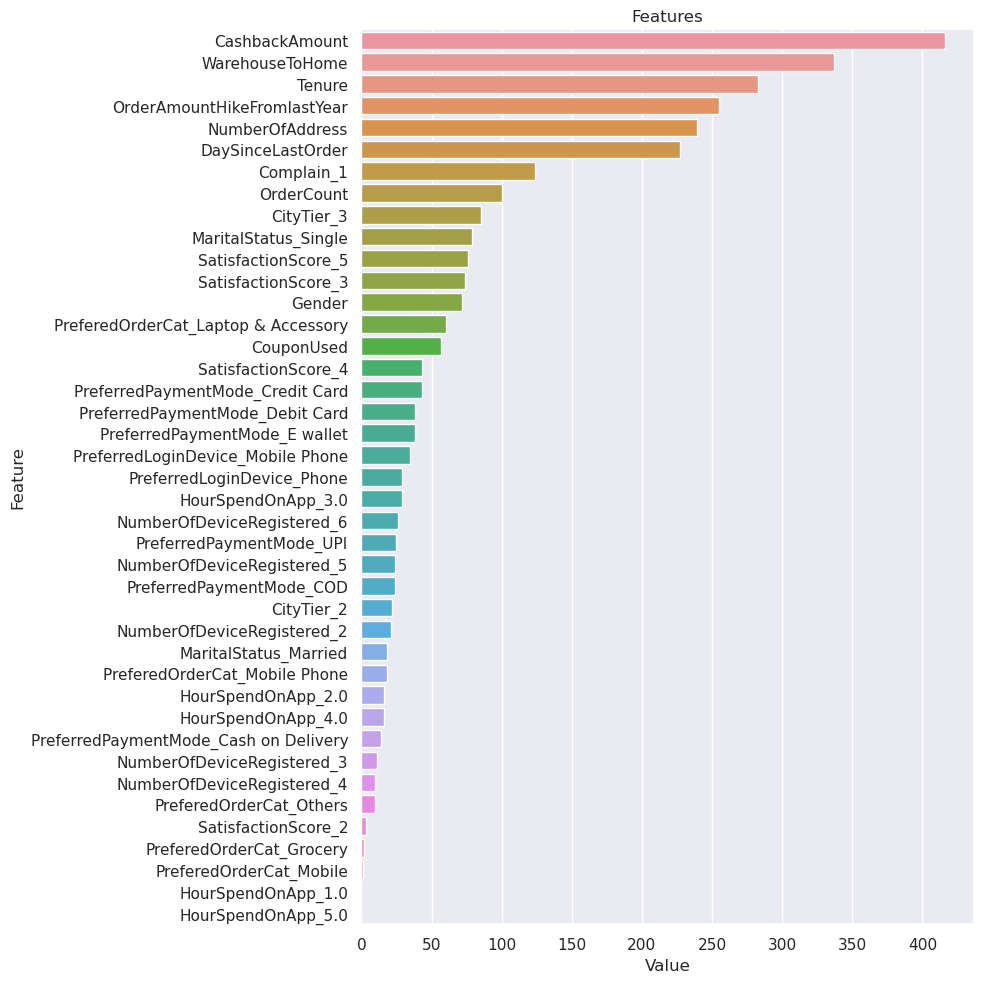

In [55]:
plot_importance(model_LightGBM, X)

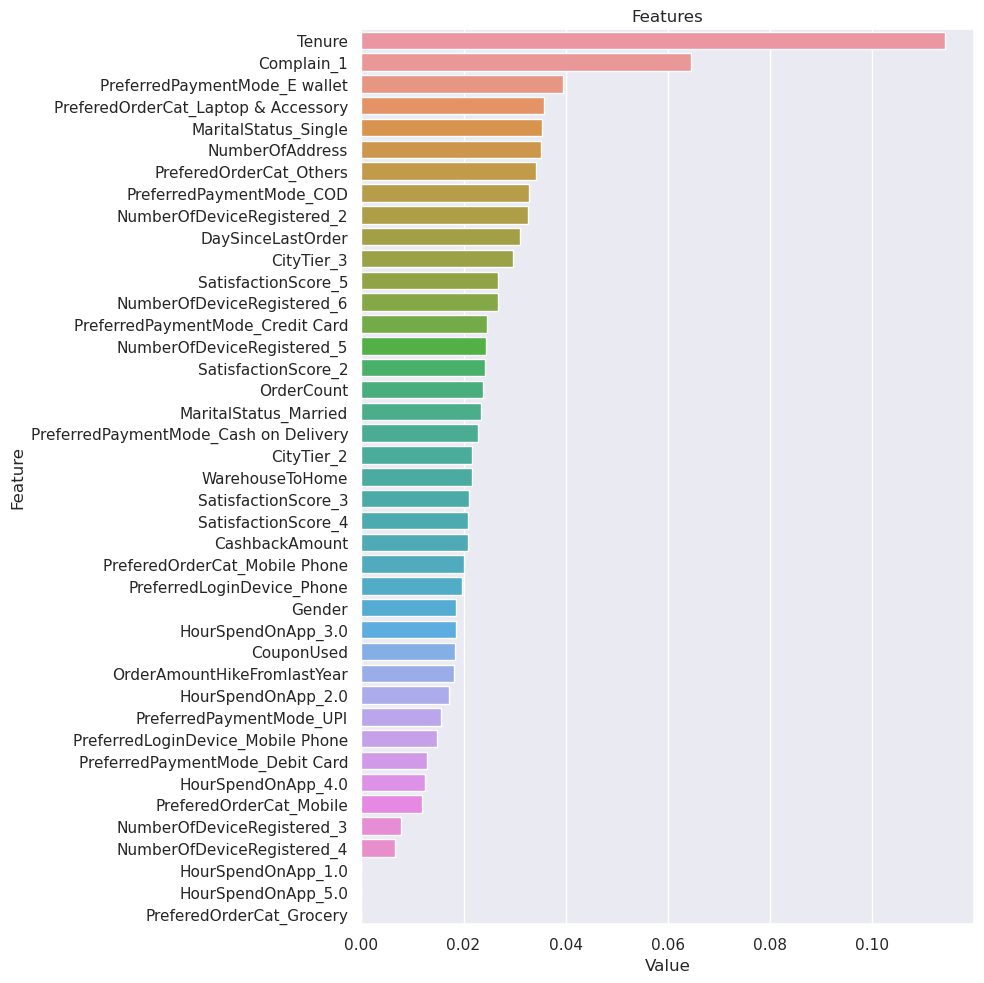

In [56]:
plot_importance(model_XGBoost, X)